<mark>📉주식 예측📈에 도전해 보자!</mark>
==================
***
***
시계열 데이터 준비
--------------------
***
>### <a>삼성전자</a>의 주가 데이터를 사용
 * 컬럼 종류: Date, Open, High, Low, Adj Close, Volume
 * 시작가(Open), 최고가(High), 최저가(Low), 종가(Close), 수정종가(Adj Close), 거래량(Volume)
 * 종가(Close)만 사용

In [1]:
# 필요한 라이브러리를 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore'),warnings.warn('ignore')

# 시계열 데이터를 가져오기
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4675.783203,74195000
2000-01-05,5800.0,6060.0,5520.0,5580.0,4270.192383,74680000
2000-01-06,5750.0,5780.0,5580.0,5620.0,4300.802734,54390000
2000-01-07,5560.0,5670.0,5360.0,5540.0,4239.581055,40305000
2000-01-10,5600.0,5770.0,5580.0,5770.0,4415.592285,46880000


#### 종가(Close)만 사용

In [2]:
ts = df['Close']

ts.head()

Date
2000-01-04    6110.0
2000-01-05    5580.0
2000-01-06    5620.0
2000-01-07    5540.0
2000-01-10    5770.0
Name: Close, dtype: float64

In [3]:
print(len(ts))

5557


## 각종 전처리 수행
***
 * #### 결측치 처리
 * #### 로그 변환

In [4]:
# 결측치 처리

ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [5]:
# 로그 변환 시도 

ts_log = np.log(ts)

## 시계열 안정성 분석
***
 * #### 정성적 그래프 분석
 * #### 정량적 Augmented Dicky-Fuller Test
 * #### 시계열 분해(Time Series Decomposition)
 * #### Residual 안정성 확인

#### 정성적 그래프 분석

In [6]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

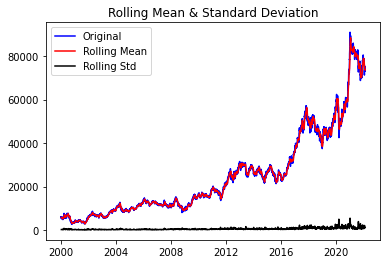

In [7]:
# ts의 Rolling Mean & Standard Deviation

plot_rolling_statistics(ts)

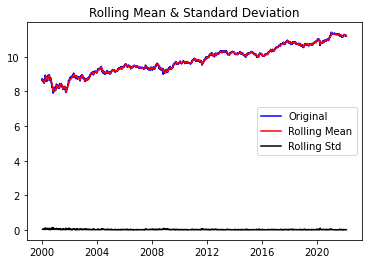

In [8]:
# ts_log의 Rolling Mean & Standard Deviation

plot_rolling_statistics(ts_log)

#### 정량적 Augmented Dicky-Fuller Test

In [9]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [10]:
# ts의 Dickey-Fuller Test

augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                    0.683460
p-value                           0.989502
#Lags Used                       26.000000
Number of Observations Used    5530.000000
Critical Value (1%)              -3.431533
Critical Value (5%)              -2.862063
Critical Value (10%)             -2.567048
dtype: float64


In [11]:
# ts_log의 Dickey-Fuller Test

augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                   -0.582823
p-value                           0.874816
#Lags Used                        4.000000
Number of Observations Used    5552.000000
Critical Value (1%)              -3.431528
Critical Value (5%)              -2.862061
Critical Value (10%)             -2.567047
dtype: float64


#### 시계열 분해(Time Series Decomposition)

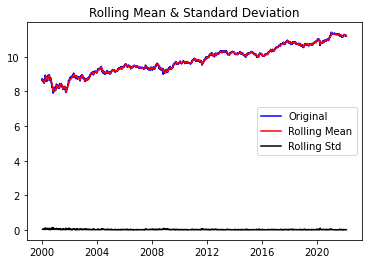

Results of Dickey-Fuller Test:
Test Statistic                   -0.582823
p-value                           0.874816
#Lags Used                        4.000000
Number of Observations Used    5552.000000
Critical Value (1%)              -3.431528
Critical Value (5%)              -2.862061
Critical Value (10%)             -2.567047
dtype: float64


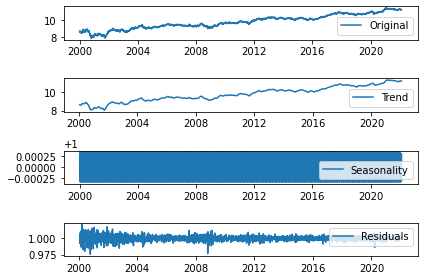

In [12]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


#### Residual 안정성 확인

In [13]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.798001e+01
p-value                        2.776896e-30
#Lags Used                     3.300000e+01
Number of Observations Used    5.493000e+03
Critical Value (1%)           -3.431541e+00
Critical Value (5%)           -2.862066e+00
Critical Value (10%)          -2.567050e+00
dtype: float64


## 학습, 테스트 데이터셋 생성
***
 * #### 학습, 테스트 데이터셋 분리

#### 학습, 테스트 데이터셋 분리

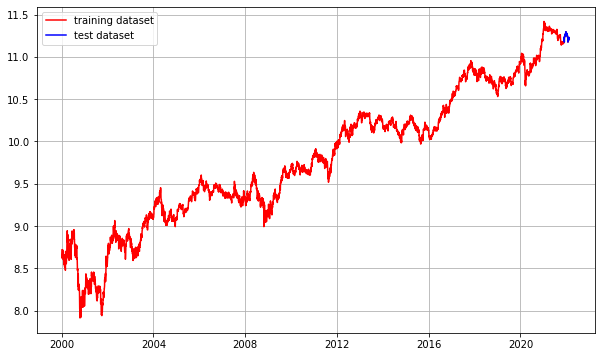

In [14]:
train_data, test_data = ts_log[:int(len(ts_log)*0.99)], ts_log[int(len(ts_log)*0.99):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

## 적정 ARIMA 모수 찾기
***
 * #### ACF, PACF 그려보기 -> p,q 구하기
 * #### 차분 안정성 확인 -> d 구하기

#### ACF, PACF 그려보기 -> p,q 구하기

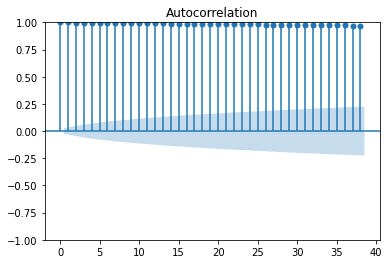

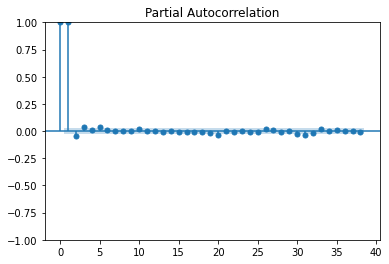

In [15]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

#### 차분 안정성 확인 -> d 구하기

Results of Dickey-Fuller Test:
Test Statistic                  -40.974279
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    5552.000000
Critical Value (1%)              -3.431528
Critical Value (5%)              -2.862061
Critical Value (10%)             -2.567047
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -22.386736
p-value                           0.000000
#Lags Used                       33.000000
Number of Observations Used    5521.000000
Critical Value (1%)              -3.431535
Critical Value (5%)              -2.862064
Critical Value (10%)             -2.567049
dtype: float64


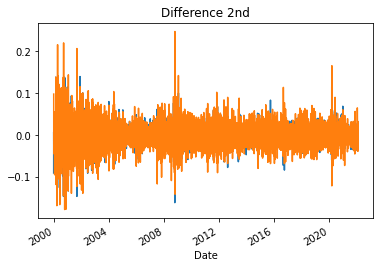

In [16]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

## ARIMA 모델 훈련과 테스트
***
 * #### ARIMA 모델 빌드와 훈련
 * #### 모델 테스트 및 플로팅
 * #### 최종 예측 모델 정확도 측정(MAPE)

#### ARIMA 모델 빌드와 훈련

In [17]:
from statsmodels.tsa.arima.model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5501
Model:                 ARIMA(2, 0, 1)   Log Likelihood               13129.171
Date:                Wed, 16 Feb 2022   AIC                         -26248.343
Time:                        09:47:21   BIC                         -26215.279
Sample:                             0   HQIC                        -26236.810
                               - 5501                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1724      0.649     15.683      0.000       8.901      11.444
ar.L1          0.0333      0.019      1.792      0.073      -0.003       0.070
ar.L2          0.9660      0.019     52.070      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### 모델 테스트 및 플로팅

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


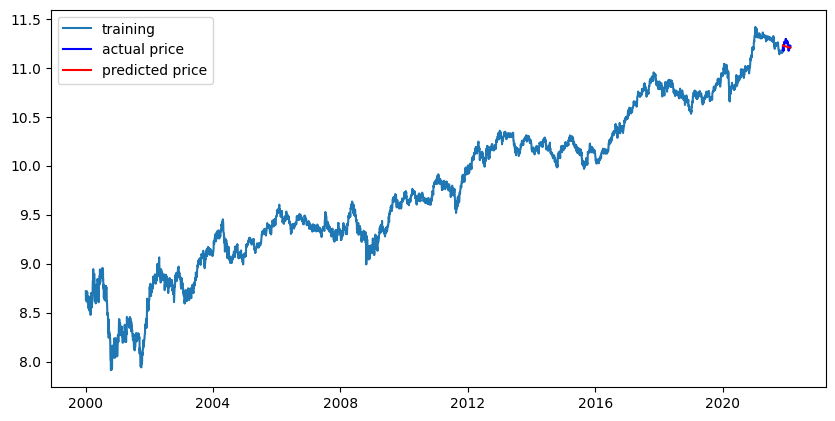

In [18]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

#### 최종 예측 모델 정확도 측정(MAPE)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  8507426.076962264
MAE:  2440.1183059136674
RMSE:  2916.749231072542
MAPE: 3.16%


주가 예측을 할 때 중요한 것은 내일의 주가를 예측하는 것이다.<br>
오늘까지의 데이터를 가지고 내일의 주가를 예측해야 한다.<br>


처음 설정된 train data의 값은 0.9였다. <br>
그렇다면 10%를 테스트 데이터로 한다면 2000년부터 2019년까지의 주가흐름을 보고 2022년의 주가흐름을 예측하는 것이 아닐까 싶었다.<br>
그래서 2000년 부터 지금까지의 데이터 중 10%를 test로 하는 것이 아니라 test의 값을 더 줄이는 것이 더 정확도를 높일 수 있을 것이라고 생각했다.<br>


train data의 비중을 높이면서 몇 차례 값을 출력해봤다.


 * train 0.9, test 0.1<br> 
 mape: 21.10%


 * train 0.95, test 0.05<br> 
 mape: 9.04%


 * train 0.99, test 0.01<br> 
 mape: 3.16%

다른 주식 종목 예측해보기
--------------------------
>### <code>팔란티어</code>의 주가 데이터를 사용
 * 컬럼 종류: Date, Open, High, Low, Adj Close, Volume
 * 시작가(Open), 최고가(High), 최저가(Low), 종가(Close), 수정종가(Adj Close), 거래량(Volume)
 * 종가(Close)만 사용

In [20]:
# 시계열 데이터를 가져오기
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/PLTR.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-30,10.00,11.41,9.11,9.50,9.50,338584400
2020-10-01,9.69,10.10,9.23,9.46,9.46,124297600
2020-10-02,9.06,9.28,8.94,9.20,9.20,55018300
2020-10-05,9.43,9.49,8.92,9.03,9.03,36316900
2020-10-06,9.04,10.18,8.90,9.90,9.90,90864000


#### 종가(Close)만 사용

In [21]:
ts = df['Close']

ts.head()

Date
2020-09-30    9.50
2020-10-01    9.46
2020-10-02    9.20
2020-10-05    9.03
2020-10-06    9.90
Name: Close, dtype: float64

In [22]:
print(len(ts))

348


## 각종 전처리 수행
***
 * #### 결측치 처리
 * #### 로그 변환

In [23]:
# 결측치 처리

ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [24]:
# 로그 변환 시도 

ts_log = np.log(ts)

## 시계열 안정성 분석
***
 * #### 정성적 그래프 분석
 * #### 정량적 Augmented Dicky-Fuller Test
 * #### 시계열 분해(Time Series Decomposition)
 * #### Residual 안정성 확인

#### 정성적 그래프 분석

In [25]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

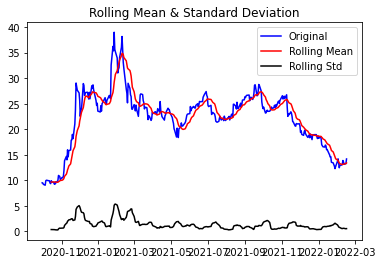

In [26]:
# ts의 Rolling Mean & Standard Deviation

plot_rolling_statistics(ts)

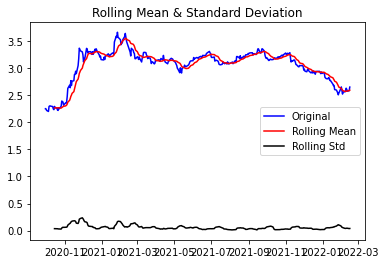

In [27]:
# ts_log의 Rolling Mean & Standard Deviation

plot_rolling_statistics(ts_log)

#### 정량적 Augmented Dicky-Fuller Test

In [28]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [29]:
# ts의 Dickey-Fuller Test

augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -3.119455
p-value                          0.025147
#Lags Used                      12.000000
Number of Observations Used    335.000000
Critical Value (1%)             -3.450022
Critical Value (5%)             -2.870207
Critical Value (10%)            -2.571387
dtype: float64


In [30]:
# ts_log의 Dickey-Fuller Test

augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -3.450610
p-value                          0.009350
#Lags Used                      12.000000
Number of Observations Used    335.000000
Critical Value (1%)             -3.450022
Critical Value (5%)             -2.870207
Critical Value (10%)            -2.571387
dtype: float64


#### 시계열 분해(Time Series Decomposition)

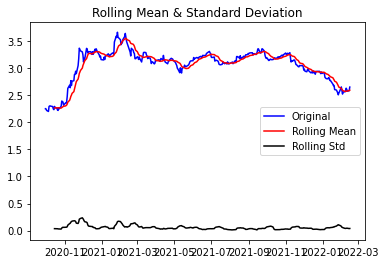

Results of Dickey-Fuller Test:
Test Statistic                  -3.450610
p-value                          0.009350
#Lags Used                      12.000000
Number of Observations Used    335.000000
Critical Value (1%)             -3.450022
Critical Value (5%)             -2.870207
Critical Value (10%)            -2.571387
dtype: float64


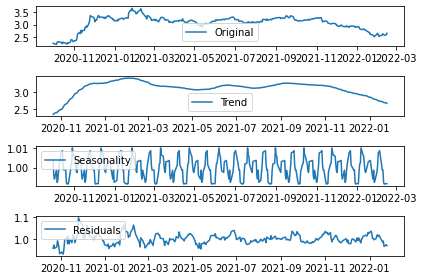

In [31]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


#### Residual 안정성 확인

In [32]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.506872e+00
p-value                        1.125465e-08
#Lags Used                     1.300000e+01
Number of Observations Used    3.040000e+02
Critical Value (1%)           -3.452045e+00
Critical Value (5%)           -2.871095e+00
Critical Value (10%)          -2.571861e+00
dtype: float64


## 학습, 테스트 데이터셋 생성
***
 * #### 학습, 테스트 데이터셋 분리

#### 학습, 테스트 데이터셋 분리

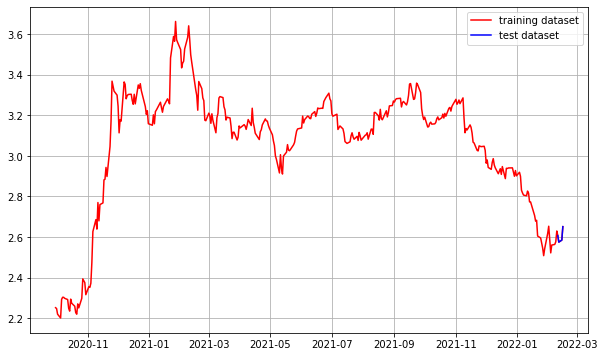

In [33]:
train_data, test_data = ts_log[:int(len(ts_log)*0.99)], ts_log[int(len(ts_log)*0.99):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

## 적정 ARIMA 모수 찾기
***
 * #### ACF, PACF 그려보기 -> p,q 구하기
 * #### 차분 안정성 확인 -> d 구하기

#### ACF, PACF 그려보기 -> p,q 구하기

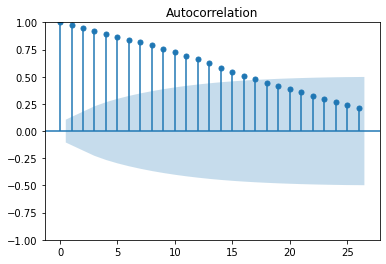

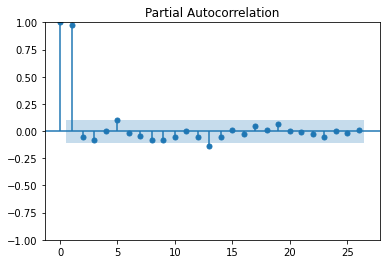

In [34]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

#### 차분 안정성 확인 -> d 구하기

Results of Dickey-Fuller Test:
Test Statistic                  -3.499593
p-value                          0.007998
#Lags Used                      11.000000
Number of Observations Used    335.000000
Critical Value (1%)             -3.450022
Critical Value (5%)             -2.870207
Critical Value (10%)            -2.571387
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.103469e+01
p-value                        5.555264e-20
#Lags Used                     1.000000e+01
Number of Observations Used    3.350000e+02
Critical Value (1%)           -3.450022e+00
Critical Value (5%)           -2.870207e+00
Critical Value (10%)          -2.571387e+00
dtype: float64


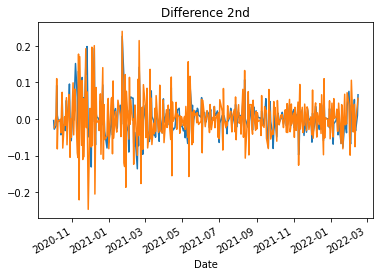

In [35]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

## ARIMA 모델 훈련과 테스트
***
 * #### ARIMA 모델 빌드와 훈련
 * #### 모델 테스트 및 플로팅
 * #### 최종 예측 모델 정확도 측정(MAPE)

#### ARIMA 모델 빌드와 훈련

In [36]:
from statsmodels.tsa.arima.model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  344
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 562.669
Date:                Wed, 16 Feb 2022   AIC                          -1115.338
Time:                        09:47:23   BIC                          -1096.135
Sample:                             0   HQIC                         -1107.690
                                - 344                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7641      0.278      9.955      0.000       2.220       3.308
ar.L1          0.1122      0.619      0.181      0.856      -1.102       1.326
ar.L2          0.8758      0.614      1.425      0.1

#### 모델 테스트 및 플로팅

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


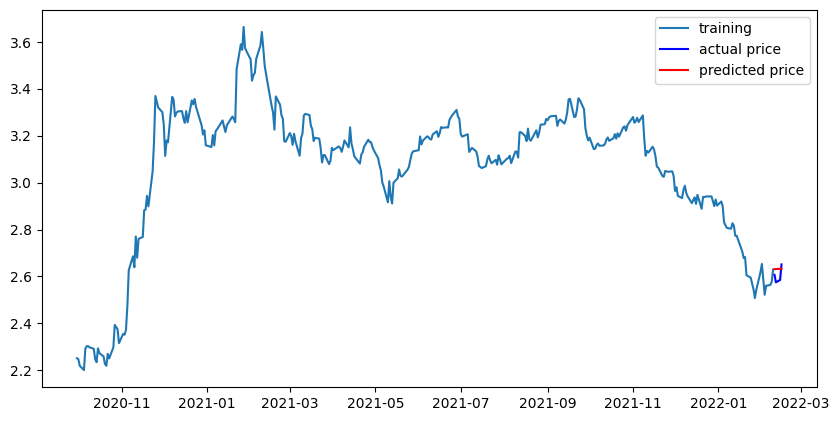

In [37]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

#### 최종 예측 모델 정확도 측정(MAPE)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  0.2932370586658396
MAE:  0.4973421866071126
RMSE:  0.5415136735723666
MAPE: 3.72%


 * train 0.9, test 0.1<br> 
 mape: 27.26%


 * train 0.95, test 0.05<br> 
 mape: 11.23%


 * train 0.99, test 0.01<br> 
 mape: 3.72%

다른 주식 종목 예측해보기
--------------------------
>### <kbd>QQQ</kbd>의 주가 데이터를 사용
 * 컬럼 종류: Date, Open, High, Low, Adj Close, Volume
 * 시작가(Open), 최고가(High), 최저가(Low), 종가(Close), 수정종가(Adj Close), 거래량(Volume)
 * 종가(Close)만 사용

In [39]:
# 시계열 데이터를 가져오기
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/QQQ.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-03-10,51.12500,51.156250,50.28125,51.0625,44.229828,5232000
1999-03-11,51.43750,51.734375,50.31250,51.3125,44.446377,9688600
1999-03-12,51.12500,51.156250,49.65625,50.0625,43.363647,8743600
1999-03-15,50.43750,51.562500,49.90625,51.5000,44.608788,6369000
1999-03-16,51.71875,52.156250,51.15625,51.9375,44.987762,4905800


#### 종가(Close)만 사용

In [40]:
ts = df['Close']

ts.head()

Date
1999-03-10    51.0625
1999-03-11    51.3125
1999-03-12    50.0625
1999-03-15    51.5000
1999-03-16    51.9375
Name: Close, dtype: float64

In [41]:
print(len(ts))

5774


## 각종 전처리 수행
***
 * #### 결측치 처리
 * #### 로그 변환

In [42]:
# 결측치 처리

ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [43]:
# 로그 변환 시도 

ts_log = np.log(ts)

## 시계열 안정성 분석
***
 * #### 정성적 그래프 분석
 * #### 정량적 Augmented Dicky-Fuller Test
 * #### 시계열 분해(Time Series Decomposition)
 * #### Residual 안정성 확인

#### 정성적 그래프 분석

In [44]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

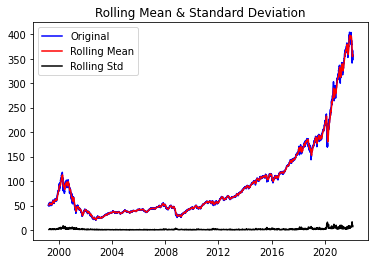

In [45]:
# ts의 Rolling Mean & Standard Deviation

plot_rolling_statistics(ts)

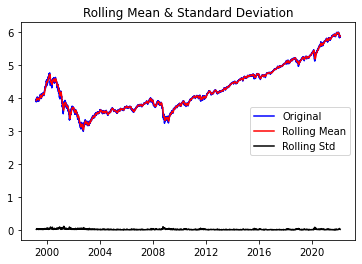

In [46]:
# ts_log의 Rolling Mean & Standard Deviation

plot_rolling_statistics(ts_log)

#### 정량적 Augmented Dicky-Fuller Test

In [47]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [48]:
# ts의 Dickey-Fuller Test

augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                    3.310665
p-value                           1.000000
#Lags Used                       34.000000
Number of Observations Used    5739.000000
Critical Value (1%)              -3.431490
Critical Value (5%)              -2.862044
Critical Value (10%)             -2.567038
dtype: float64


In [49]:
# ts_log의 Dickey-Fuller Test

augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                    0.643479
p-value                           0.988640
#Lags Used                       34.000000
Number of Observations Used    5739.000000
Critical Value (1%)              -3.431490
Critical Value (5%)              -2.862044
Critical Value (10%)             -2.567038
dtype: float64


#### 시계열 분해(Time Series Decomposition)

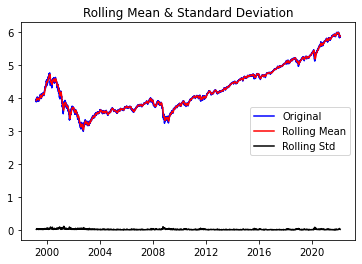

Results of Dickey-Fuller Test:
Test Statistic                    0.643479
p-value                           0.988640
#Lags Used                       34.000000
Number of Observations Used    5739.000000
Critical Value (1%)              -3.431490
Critical Value (5%)              -2.862044
Critical Value (10%)             -2.567038
dtype: float64


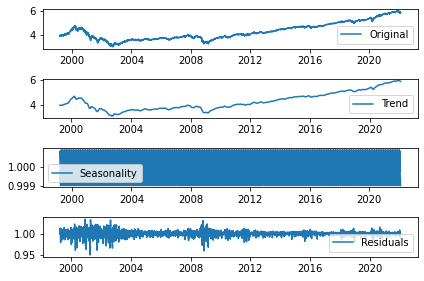

In [50]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


#### Residual 안정성 확인

In [51]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.751863e+01
p-value                        4.297205e-30
#Lags Used                     3.400000e+01
Number of Observations Used    5.709000e+03
Critical Value (1%)           -3.431496e+00
Critical Value (5%)           -2.862046e+00
Critical Value (10%)          -2.567040e+00
dtype: float64


## 학습, 테스트 데이터셋 생성
***
 * #### 학습, 테스트 데이터셋 분리

#### 학습, 테스트 데이터셋 분리

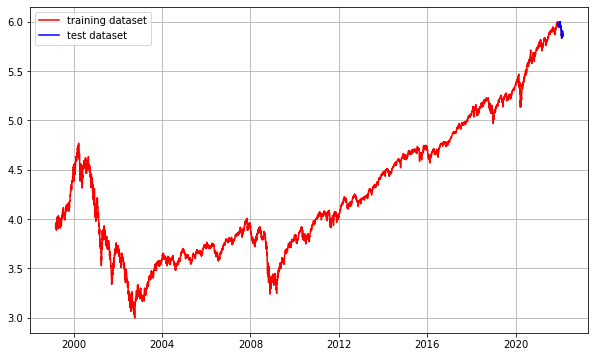

In [52]:
train_data, test_data = ts_log[:int(len(ts_log)*0.99)], ts_log[int(len(ts_log)*0.99):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

## 적정 ARIMA 모수 찾기
***
 * #### ACF, PACF 그려보기 -> p,q 구하기
 * #### 차분 안정성 확인 -> d 구하기

#### ACF, PACF 그려보기 -> p,q 구하기

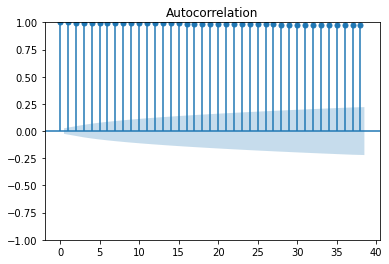

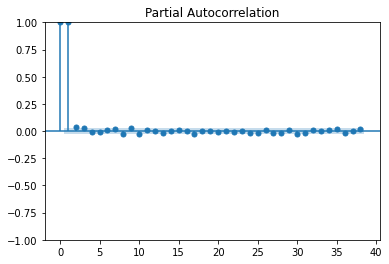

In [53]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

#### 차분 안정성 확인 -> d 구하기

Results of Dickey-Fuller Test:
Test Statistic                -1.304759e+01
p-value                        2.175504e-24
#Lags Used                     3.300000e+01
Number of Observations Used    5.739000e+03
Critical Value (1%)           -3.431490e+00
Critical Value (5%)           -2.862044e+00
Critical Value (10%)          -2.567038e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -21.655900
p-value                           0.000000
#Lags Used                       34.000000
Number of Observations Used    5737.000000
Critical Value (1%)              -3.431490
Critical Value (5%)              -2.862044
Critical Value (10%)             -2.567038
dtype: float64


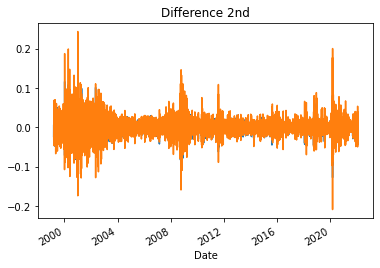

In [54]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

## ARIMA 모델 훈련과 테스트
***
 * #### ARIMA 모델 빌드와 훈련
 * #### 모델 테스트 및 플로팅
 * #### 최종 예측 모델 정확도 측정(MAPE)

#### ARIMA 모델 빌드와 훈련

In [55]:
from statsmodels.tsa.arima.model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5716
Model:                 ARIMA(2, 0, 1)   Log Likelihood               15044.604
Date:                Wed, 16 Feb 2022   AIC                         -30079.209
Time:                        09:47:32   BIC                         -30045.954
Sample:                             0   HQIC                        -30067.632
                               - 5716                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3763    2.3e-10    1.9e+10      0.000       4.376       4.376
ar.L1          0.0007      0.002      0.469      0.639      -0.002       0.004
ar.L2          0.9993      0.002    638.536      0.0

#### 모델 테스트 및 플로팅

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


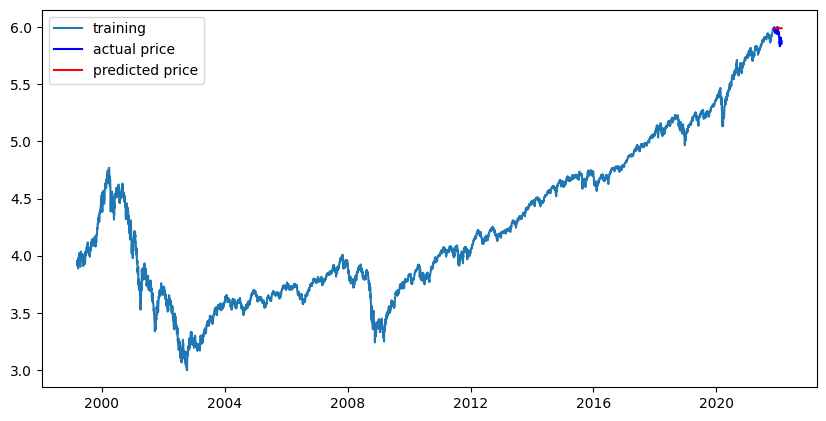

In [56]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

#### 최종 예측 모델 정확도 측정(MAPE)

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  761.077836445579
MAE:  20.838630127589646
RMSE:  27.587639196668842
MAPE: 5.75%


 * train 0.9, test 0.1<br> 
 mape: 30.94%


 * train 0.95, test 0.05<br> 
 mape: 11.91%


 * train 0.99, test 0.01<br> 
 mape: 5.75%

<kbd>회고</kbd>
========
***
주식... 관심있는 분야라서 하면서 좀 흥미로웠다...<br>
삼전이 어떻게 될까는 요즘 대부분의 사람들이 관심이 있는 분야이고,<br>
팔란티어와 QQQ는 내가 관심있는 종목이라 해봤다.


사실 위에서 적은 것 처럼 train data를 늘리고 test data를 낮춰서 분석을 하는 것이 맞는지는 모르겠다.<br>
다시 생각해보면 오늘까지의 주가 데이터를 학습시키고 내일이나 그 이후의 예측을 할 기간을 null값으로 하거나 0으로 처리해서 분석을 하면 되지 않을까 싶다.<br>

그리고 통계적인 지식이 부족한데 이번 프로젝트를 하면서 다룰 수 있게 되어서 좋았다.<br>
이동 평균, 이동 표준편차와 같은 개념을 조금이나마 잡을 수 있었다.<br>
어디선가 귀동냥으로 들은 귀무가설과 대립가설을 알게 되었고 p-value와 같은 개념도 다루고 넘어가서 좋았다.

아무튼 힘내보자..